In [68]:
# Librerías
import numpy as np
import pandas as pd
import statsmodels.api as cm
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:

df = pd.read_csv("../data/processed_data.csv")
df.head()

# Male: 1, Female: 0 (Gender)
# Obese: 3, Normal: 2, Overweight: 1 (BMI Category)
# Sleep Apnea: 1, None: 0, Insomnia: 2

,Unnamed: 0,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,0,1,1,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,0,126,83
1,1,2,1,28,Doctor,6.2,6,60,8,1,125/80,75,10000,0,125,80
2,2,3,1,28,Doctor,6.2,6,60,8,1,125/80,75,10000,0,125,80
3,3,4,1,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,1,140,90
4,4,5,1,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,1,140,90


In [4]:
df['BMI Category']=df['BMI Category'].replace({2:0})
df['BMI Category']=df['BMI Category'].replace({3:2})
# Pasando a que Normal:0, Overweight:1, Obese:2

In [5]:
df['Occupation'].value_counts()
# Categorizando
df['Occupation']=df['Occupation'].replace({'Nurse':0}) # Healthcare Professional
df['Occupation']=df['Occupation'].replace({'Doctor':0})
df['Occupation']=df['Occupation'].replace({'Engineer':1}) # STEM Professional 
df['Occupation']=df['Occupation'].replace({'Software Engineer':1})
df['Occupation']=df['Occupation'].replace({'Scientist':1})
df['Occupation']=df['Occupation'].replace({'Lawyer':2}) # Lawyer
df['Occupation']=df['Occupation'].replace({'Teacher':3}) # Teacher
df['Occupation']=df['Occupation'].replace({'Accountant':4}) # Accountant
df['Occupation']=df['Occupation'].replace({'Manager':5}) # Sales Professional
df['Occupation']=df['Occupation'].replace({'Sales Representative':5})
df['Occupation']=df['Occupation'].replace({'Salesperson':5})

/var/folders/p8/96d3g_wj42nfdr3ndh2m3b8m0000gn/T/ipykernel_53583/260211907.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Occupation']=df['Occupation'].replace({'Salesperson':5})


In [6]:
df['Quality of Sleep'].value_counts()
# Categorizando 
df['Quality of Sleep']=df['Quality of Sleep'].replace({4:0}) # Fair
df['Quality of Sleep']=df['Quality of Sleep'].replace({5:0})
df['Quality of Sleep']=df['Quality of Sleep'].replace({6:0})
df['Quality of Sleep']=df['Quality of Sleep'].replace({7:1}) # Good
df['Quality of Sleep']=df['Quality of Sleep'].replace({8:2}) # Excellent
df['Quality of Sleep']=df['Quality of Sleep'].replace({9:2})

In [7]:
df['Stress Level'].value_counts()
# Categorizando 
df['Stress Level']=df['Stress Level'].replace({3:0}) # Low
df['Stress Level']=df['Stress Level'].replace({4:0})
df['Stress Level']=df['Stress Level'].replace({5:1}) # Moderate
df['Stress Level']=df['Stress Level'].replace({6:1})
df['Stress Level']=df['Stress Level'].replace({7:2}) # High
df['Stress Level']=df['Stress Level'].replace({8:2}) 

In [8]:
# Deshaciendose de columnas inutiles
df_final=df.drop(['Unnamed: 0', 'Person ID','Blood Pressure'], axis=1)

In [9]:
#Visualizar dataset limpio
df_final.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,27,1,6.1,0,42,1,0,77,4200,0,126,83
1,1,28,0,6.2,0,60,2,1,75,10000,0,125,80
2,1,28,0,6.2,0,60,2,1,75,10000,0,125,80
3,1,28,5,5.9,0,30,2,2,85,3000,1,140,90
4,1,28,5,5.9,0,30,2,2,85,3000,1,140,90


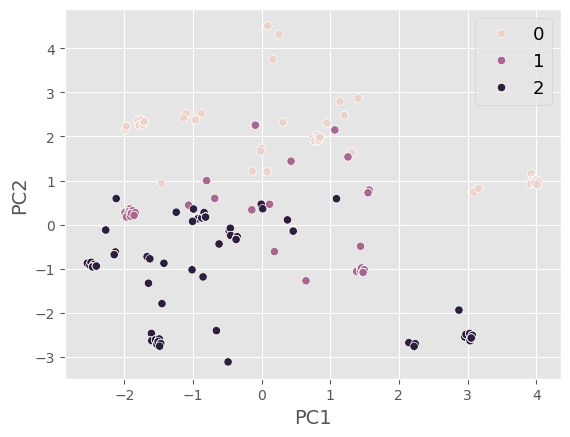

In [10]:
# Primera prediccion: calidad de sueño
df_calidad=df_final.drop(['Quality of Sleep'],axis=1)

# Estandarización
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_X = sc.fit_transform(df_calidad)  
scaled_X[:5]   

#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(scaled_X)   # Returns a NumPy array 
X_pca[:5]

PC1 = X_pca[:,0]   # Extract the first column
PC2 = X_pca[:,1]   # Extract the second column

df_PCA = pd.DataFrame({'PC1': PC1, 'PC2': PC2, 'label': df_final['Quality of Sleep']})
df_PCA.head()

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_PCA, x="PC1", y="PC2", hue="label")
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.legend(fontsize=13, title_fontsize='40')
plt.show()

In [11]:
# Análisis
pca.explained_variance_ratio_
# Los 4 componentes tienen alrededor del 82% de la varianza


array([0.32280678, 0.22980944, 0.16417012, 0.0929431 ])

In [12]:
for index, component in enumerate(np.round(pca.components_, 2)):
    res = []
    for value, col_name in zip(component, df_calidad.columns):
        res.append(f'{value} {col_name}')
    print(f'PC{index+1}: ' + ' + '.join(res))


PC1: -0.2 Gender + 0.33 Age + -0.07 Occupation + -0.13 Sleep Duration + 0.19 Physical Activity Level + 0.11 Stress Level + -0.35 BMI Category + 0.16 Heart Rate + 0.14 Daily Steps + 0.41 Sleep Disorder + 0.46 Systolic Pressure + 0.48 Diastolic Pressure
PC2: 0.35 Gender + -0.36 Age + 0.08 Occupation + -0.48 Sleep Duration + -0.1 Physical Activity Level + 0.54 Stress Level + 0.02 BMI Category + 0.45 Heart Rate + -0.03 Daily Steps + 0.09 Sleep Disorder + 0.01 Systolic Pressure + -0.02 Diastolic Pressure
PC3: 0.22 Gender + -0.11 Age + -0.42 Occupation + 0.16 Sleep Duration + 0.57 Physical Activity Level + 0.07 Stress Level + 0.2 BMI Category + 0.09 Heart Rate + 0.54 Daily Steps + -0.23 Sleep Disorder + 0.0 Systolic Pressure + 0.07 Diastolic Pressure
PC4: -0.13 Gender + -0.09 Age + 0.52 Occupation + -0.24 Sleep Duration + 0.21 Physical Activity Level + 0.03 Stress Level + -0.42 BMI Category + -0.27 Heart Rate + 0.5 Daily Steps + -0.0 Sleep Disorder + -0.28 Systolic Pressure + -0.17 Diastolic

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# 1. Definir X, pero sin la columna a predecir
X = df_final.drop('Quality of Sleep', axis=1).to_numpy()
y = df_final['Quality of Sleep'].to_numpy()

# 2. Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# 3. Estandarización (fit solo en train)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled  = sc.transform(X_test)

# 4. PCA sobre los datos escalados
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Train shape (PCA):", X_train_pca.shape)
print("Test shape (PCA):", X_test_pca.shape)
print("Variance acumulada retained PCs:", np.sum(pca.explained_variance_ratio_))


Train shape (PCA): (299, 2)
Test shape (PCA): (75, 2)
Variance acumulada retained PCs: 0.5543378828497085


In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train.ravel())

y_predictor = knn.predict(X_test_pca)

print('Predicción        = ', y_predictor)
print('Valor observado   = ', y_test.ravel())
print('Score clasificación = ', knn.score(X_test_pca, y_test))

#EL MEJOR, REQUIERE DE 3 VECINOS Y DE 2 PCA

Predicción        =  [0 2 0 1 0 2 2 2 0 2 0 2 1 1 0 2 2 2 0 2 0 2 0 2 0 1 0 1 0 0 2 2 1 2 2 2 1
 2 0 0 0 2 2 0 2 2 0 2 2 2 0 0 1 0 1 1 2 1 2 1 2 2 1 2 0 0 2 2 1 2 2 1 0 2
 2]
Valor observado   =  [0 2 0 2 2 2 2 2 0 2 0 0 1 1 0 2 2 2 1 2 1 0 0 0 2 1 1 0 0 0 2 2 2 2 2 2 1
 2 0 0 2 2 2 1 2 2 0 2 2 2 0 0 2 0 1 1 2 1 2 1 2 2 1 2 0 0 2 2 1 2 2 1 0 2
 2]
Score clasificación =  0.8133333333333334


In [60]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)   # 👈 y_train es 1D y es tu target real

y_predictor = svm.predict(X_test_pca)  # 👈 usas la data con PCA
print('Comparación de la predicción con la observada')
print('Predicción        = ', y_predictor)
print('Especie observada = ', y_test.ravel())
print('Puntuación (score) =', svm.score(X_test_pca, y_test))

# Malo, necesita 5 PCAs para igualar anteior score


Comparación de la predicción con la observada
Predicción        =  [0 0 0 2 2 2 0 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 0 0 0 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2
 2]
Especie observada =  [0 2 0 2 2 2 2 2 0 2 0 0 1 1 0 2 2 2 1 2 1 0 0 0 2 1 1 0 0 0 2 2 2 2 2 2 1
 2 0 0 2 2 2 1 2 2 0 2 2 2 0 0 2 0 1 1 2 1 2 1 2 2 1 2 0 0 2 2 1 2 2 1 0 2
 2]
Puntuación (score) = 0.5333333333333333


In [73]:
from sklearn.tree import DecisionTreeClassifier
#===============================================================================
# ALGORITMO: Decision Tree Classifier
tree=DecisionTreeClassifier()
tree.fit(X_train_pca,y_train.ravel())
y_predictor=tree.predict(X_test_pca)
print('Comparación de la predicción con la especie observada')
print('Predicción        = ', y_predictor)
print('Especie observada = ', y_test.ravel())
print('Puntuación (score) de la clasificación ', tree.score(X_test_pca, y_test))

# Más ligero que knn

Comparación de la predicción con la especie observada
Predicción        =  [0 2 0 2 2 2 2 2 0 2 0 0 1 1 0 2 2 2 2 2 0 0 0 0 2 1 1 0 0 0 2 2 2 2 2 2 1
 2 0 0 2 2 2 1 2 2 0 2 2 2 0 0 2 0 1 1 2 1 2 1 2 1 1 2 0 0 2 2 1 2 2 1 0 2
 2]
Especie observada =  [0 2 0 2 2 2 2 2 0 2 0 0 1 1 0 2 2 2 1 2 1 0 0 0 2 1 1 0 0 0 2 2 2 2 2 2 1
 2 0 0 2 2 2 1 2 2 0 2 2 2 0 0 2 0 1 1 2 1 2 1 2 2 1 2 0 0 2 2 1 2 2 1 0 2
 2]
Puntuación (score) de la clasificación  0.96


In [ ]:
from sklearn.neural_network import MLPClassifier
#===============================================================================
# ALGORITMO: Multi-layer Perceptor classifier
neuralnet = MLPClassifier()#
neuralnet.fit(X_train_pca,y_train.ravel()) # Entrenamos el algoritmo
#===============================================================================
# PREDICCIÓN, PRUEBA Y SCORE
y_predictor = neuralnet.predict(X_test_pca)
print('Comparación de la predicción con la especie observada')
print('Predicción        = ', y_predictor)
print('Especie observada = ', y_test.ravel())
print('Puntuación (score) de la clasificación ', neuralnet.score(X_test_pca, y_test))

#Sigue siendo mejor el decision tree

Comparación de la predicción con la especie observada
Predicción        =  [0 0 0 0 2 2 0 2 0 2 0 1 2 2 0 2 2 2 2 2 2 1 2 2 0 2 2 1 0 2 2 2 0 2 2 2 2
 2 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 1 1 0 1 2 2 0 2 1 2 2 0 2 2 2 2 2 2 0 2
 2]
Especie observada =  [0 2 0 2 2 2 2 2 0 2 0 0 1 1 0 2 2 2 1 2 1 0 0 0 2 1 1 0 0 0 2 2 2 2 2 2 1
 2 0 0 2 2 2 1 2 2 0 2 2 2 0 0 2 0 1 1 2 1 2 1 2 2 1 2 0 0 2 2 1 2 2 1 0 2
 2]
Puntuación (score) de la clasificación  0.5733333333333334


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [69]:
#===============================================================================
# ALGORITMO: Gaussian process classification (GPC) based on Laplace approximation.
gauss= GaussianProcessClassifier()
gauss.fit(X_train_pca,y_train.ravel())
y_predictor=gauss.predict(X_test_pca)
print('Comparación de la predicción con la especie observada')
print('Predicción        = ', y_predictor)
print('Especie observada = ', y_test.ravel())
print('Puntuación (score) de la clasificación ', gauss.score(X_test_pca, y_test))

Comparación de la predicción con la especie observada
Predicción        =  [0 2 0 0 2 2 2 2 0 2 0 1 2 2 0 2 2 2 0 2 2 1 2 2 0 2 2 1 0 2 2 2 0 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 1 2 2 0 2 2 2 2 2 2 0 2
 2]
Especie observada =  [0 2 0 2 2 2 2 2 0 2 0 0 1 1 0 2 2 2 1 2 1 0 0 0 2 1 1 0 0 0 2 2 2 2 2 2 1
 2 0 0 2 2 2 1 2 2 0 2 2 2 0 0 2 0 1 1 2 1 2 1 2 2 1 2 0 0 2 2 1 2 2 1 0 2
 2]
Puntuación (score) de la clasificación  0.6533333333333333


In [70]:
#===============================================================================
# ALGORITMO: Gaussian Naive Bayer
gaussNB=GaussianNB()
gaussNB.fit(X_train_pca,y_train.ravel())
y_predictor=gaussNB.predict(X_test_pca)
print('Comparación de la predicción con la especie observada')
print('Predicción        = ', y_predictor)
print('Especie observada = ', y_test.ravel())
print('Puntuación (score) de la clasificación ', gaussNB.score(X_test_pca, y_test))

Comparación de la predicción con la especie observada
Predicción        =  [0 0 0 2 2 2 0 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2
 2]
Especie observada =  [0 2 0 2 2 2 2 2 0 2 0 0 1 1 0 2 2 2 1 2 1 0 0 0 2 1 1 0 0 0 2 2 2 2 2 2 1
 2 0 0 2 2 2 1 2 2 0 2 2 2 0 0 2 0 1 1 2 1 2 1 2 2 1 2 0 0 2 2 1 2 2 1 0 2
 2]
Puntuación (score) de la clasificación  0.52


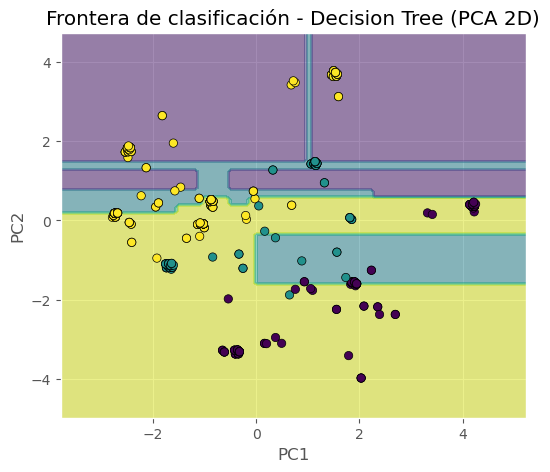

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# === Dataset para plotear frontera ===
X = X_pca  # el resultado 2D del PCA completo (o PC1/PC2)

# Límites de la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.1  # resolución

# Malla de puntos
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predicción sobre la malla
Z = tree.predict(grid)
Z = Z.reshape(xx.shape)

# Colormap sin especificar colores manualmente (excepto si quieres)
cmap = ListedColormap(['#A0A0A0','#606060','#303030','#000000','#C0C0C0'])  # esto es opcional si no quieres default

# === Gráfico ===
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Frontera de clasificación - Decision Tree (PCA 2D)")
plt.show()


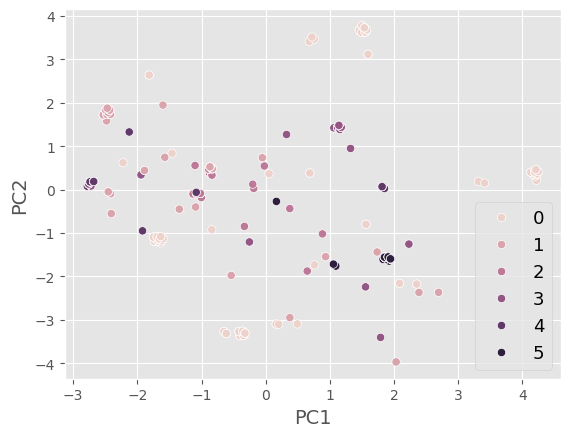

In [48]:
# Segunda prediccion: ocupación
df_ocupacion=df_final.drop(['Occupation'],axis=1)

# Estandarización
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_X = sc.fit_transform(df_ocupacion)  
scaled_X[:5]   

#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(scaled_X)   # Returns a NumPy array 
X_pca[:5]

PC1 = X_pca[:,0]   # Extract the first column
PC2 = X_pca[:,1]   # Extract the second column

df_PCA = pd.DataFrame({'PC1': PC1, 'PC2': PC2, 'label': df_final['Occupation']})
df_PCA.head()

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_PCA, x="PC1", y="PC2", hue="label")
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.legend(fontsize=13, title_fontsize='40')
plt.show()

In [16]:
# Análisis
pca.explained_variance_ratio_
#Los 4 componentes tienen alrededor del 85% de la varianza

array([0.33986684, 0.27770607, 0.15005543, 0.08265984])

In [17]:
for index, component in enumerate(np.round(pca.components_, 2)):
    res = []
    for value, col_name in zip(component, df_ocupacion.columns):
        res.append(f'{value} {col_name}')
    print(f'PC{index+1}: ' + ' + '.join(res))


PC1: -0.09 Gender + 0.18 Age + -0.29 Sleep Duration + -0.32 Quality of Sleep + 0.1 Physical Activity Level + 0.27 Stress Level + -0.32 BMI Category + 0.27 Heart Rate + 0.1 Daily Steps + 0.4 Sleep Disorder + 0.41 Systolic Pressure + 0.41 Diastolic Pressure
PC2: -0.35 Gender + 0.44 Age + 0.35 Sleep Duration + 0.37 Quality of Sleep + 0.2 Physical Activity Level + -0.4 Stress Level + -0.16 BMI Category + -0.29 Heart Rate + 0.1 Daily Steps + 0.1 Sleep Disorder + 0.2 Systolic Pressure + 0.23 Diastolic Pressure
PC3: 0.26 Gender + -0.14 Age + 0.09 Sleep Duration + 0.11 Quality of Sleep + 0.65 Physical Activity Level + 0.12 Stress Level + 0.14 BMI Category + 0.11 Heart Rate + 0.63 Daily Steps + -0.18 Sleep Disorder + -0.0 Systolic Pressure + 0.07 Diastolic Pressure
PC4: 0.37 Gender + 0.08 Age + 0.31 Sleep Duration + 0.18 Quality of Sleep + 0.02 Physical Activity Level + -0.01 Stress Level + 0.51 BMI Category + 0.35 Heart Rate + -0.41 Daily Steps + 0.09 Sleep Disorder + 0.35 Systolic Pressure + 